# House Price Prediction 

## <i>Description of Dataset </i>

In this dataset we have to predict the sales price of houses in King County, Seattle. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

## <i>List of Attributes</i>

1. <b>id</b> - It is the unique numeric number assigned to each house being sold.
2. <b>date</b> - It is the date on which the house was sold out.
3. <b>price</b> - It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. <b>bedrooms</b> - It determines number of bedrooms in a house.
5. <b>bathrooms</b> - It determines number of bathrooms in a bedroom of a house.
6. <b>sqft_living</b> - It is the measurement variable which determines the measurement of house in square foot.
7. <b>sqft_lot</b> - It is also the measurement variable which determines square foot of the lot.
8. <b>floors</b> - It determines total floors means levels of house.
9. <b>waterfront</b> - This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. <b>view</b> - This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. <b>condition</b> - It determines the overall condition of a house on a scale of 1 to 5.
12. <b>grade</b> - It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
13. <b>sqft_above</b> - It determines square footage of house apart from basement.
14. <b>sqft_basement</b> - It determines square footage of the basement of the house.
15. <b>yr_built</b> - It detrmines the date of building of the house.
16. <b>yr_renovated</b> - It detrmines year of renovation of house.
17. <b>zipcode</b> - It determines the zipcode of the location of the house.
18. <b>lat</b> - It determines the latitude of the location of the house.
19. <b>long</b> - It determines the longitude of the location of the house.
20. <b>sqft_living15</b> - Living room area in 2015(implies-- some renovations)
21. <b>sqft_lot15</b> - lotSize area in 2015(implies-- some renovations)

## <i>Objective</i>

The objective of this project is to perform data cleansing, and required transformations. The basic goal is to build a predictive model which will predict the prices of houses.

### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from time import time
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Load data

In [2]:
warnings.filterwarnings("ignore") # to ignore warnings
house = pd.read_csv(r"C:\Users\intel\Desktop\Datasets\house_data.csv", header = 0)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Pre-Processing

In [3]:
house1=house.copy()
house1.rename(columns={'price':'SalePrice','bedrooms':'Bedrooms', 'bathrooms':'Bathrooms', 'sqft_living':'LivingSpace',
                       'sqft_lot':'LandSpace', 'floors':'Floors', 'waterfront':'Waterfront', 'view':'View', 
                       'condition':'Condition','grade':'Grade','sqft_above':'Above_sqft', 'sqft_basement':'Basement', 
                       'yr_built':'YearBuilt', 'yr_renovated':'Renovation', 'zipcode':'Zipcode','lat':'Latitude', 
                       'long':'Longitude', 'sqft_living15':'LivingSpace15', 'sqft_lot15':'LandSpace15'},inplace=True)
house1.head()

,id,date,SalePrice,Bedrooms,Bathrooms,LivingSpace,LandSpace,Floors,Waterfront,View,...,Grade,Above_sqft,Basement,YearBuilt,Renovation,Zipcode,Latitude,Longitude,LivingSpace15,LandSpace15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#to get information of data(i.e.data type of variable & also whether it contains null values or not
print(house1.info()) 

# to get summary statistics of data
print(house1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   SalePrice      21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   LivingSpace    21613 non-null  int64  
 6   LandSpace      21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Above_sqft     21613 non-null  int64  
 13  Basement       21613 non-null  int64  
 14  YearBuilt      21613 non-null  int64  
 15  Renovation     21613 non-null  int64  
 16  Zipcode        21613 non-null  int64  
 17  Latitude       21613 non-null  float64
 18  Longit

### <i>Correlations w.r.t SalePrice</i>

In [5]:
features = house1.iloc[:,3:].columns.tolist()
target = house1.iloc[:,2].name

In [6]:
# Finding Correlation of SalePrice with other variables to see how many variables are strongly correlated with SalePrice
correlations = {}
for f in features:
    house_tp = house1[[f,target]]
    x1 = house_tp[f].values
    x2 = house_tp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [7]:
# Printing all the correlated features value with respect to SalePrice which is our target variable
house_corr = pd.DataFrame(correlations, index=['Value']).T
house_corr.loc[house_corr['Value'].abs().sort_values(ascending=False).index]

,Value
LivingSpace vs SalePrice,0.702044
Grade vs SalePrice,0.667463
Above_sqft vs SalePrice,0.605566
LivingSpace15 vs SalePrice,0.585374
Bathrooms vs SalePrice,0.525134
View vs SalePrice,0.397346
Basement vs SalePrice,0.323837
Bedrooms vs SalePrice,0.308338
Latitude vs SalePrice,0.306919
Waterfront vs SalePrice,0.266331


As zipcode is negatively correlated with price, we can discard it for sales prediction

### <i>Variance Inflation Factor</i>

In [8]:
features = house1.iloc[:,3:]
target = house1.iloc[:,2]

In [9]:
#standardizing the values
scaler = StandardScaler()
scaler.fit(features)
x = scaler.transform(features)

In [10]:
x=pd.DataFrame(x)
x.columns = ['Bedrooms', 'Bathrooms', 'LivingSpace','LandSpace', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
             'Above_sqft', 'Basement', 'YearBuilt', 'Renovation', 'Zipcode',
             'Latitude', 'Longitude', 'LivingSpace15', 'LandSpace15']
vif_house1 = pd.DataFrame()
vif_house1["features"] = x.columns
vif_house1["VIF"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_house1.round(1)

,features,VIF
0,Bedrooms,1.7
1,Bathrooms,3.4
2,LivingSpace,inf
3,LandSpace,2.1
4,Floors,2.0
5,Waterfront,1.2
6,View,1.4
7,Condition,1.2
8,Grade,3.4
9,Above_sqft,inf


As it is seen that LivingSpace, Above_sqft, Basement has VIF of 'inf' we will discard the variable one by one and again check the VIF for remaining variables

In [11]:
house2=x.copy()
house2=x[['Bedrooms', 'Bathrooms', 'LandSpace', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
          'Above_sqft', 'Basement', 'YearBuilt', 'Renovation','Latitude', 'Longitude', 'LivingSpace15', 'LandSpace15']]
vif_house1 = pd.DataFrame()
vif_house1["features"] = house2.columns
vif_house1["VIF"] = [vif(house2.values, i) for i in range(house2.shape[1])]
vif_house1.round(1)

,features,VIF
0,Bedrooms,1.6
1,Bathrooms,3.3
2,LandSpace,2.1
3,Floors,2.0
4,Waterfront,1.2
5,View,1.4
6,Condition,1.2
7,Grade,3.4
8,Above_sqft,4.9
9,Basement,2.0


Concluding that we have nominal values of VIF for the remaining variables, we further proceed for EDA

## EDA

In [12]:
sns.set(style="whitegrid",font_scale=1)

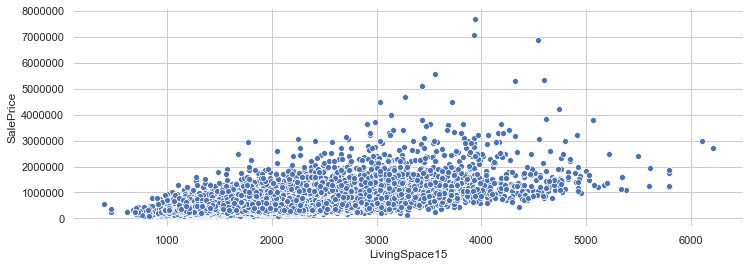

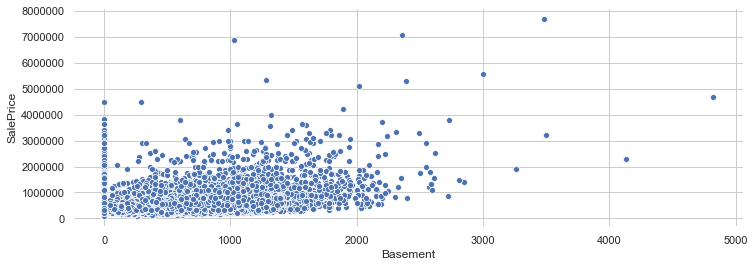

In [13]:
f, axes = plt.subplots(figsize=(12,4))
sns.scatterplot(x=house1['LivingSpace15'],y=house1['SalePrice'])
sns.despine(left=True, bottom=True)

f, axe = plt.subplots(figsize=(12,4))
sns.despine(left=True, bottom=True)
sns.scatterplot(x=house1['Basement'],y=house1['SalePrice'], ax=axe)

We can conclude that LivingSpace15, Basement shows some linear relationship with our target variable i.e. SalePrice

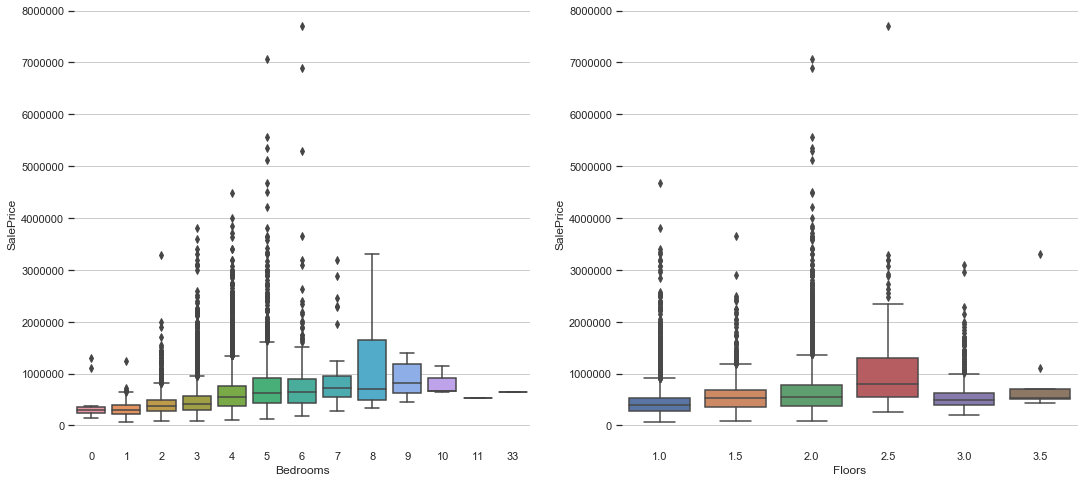

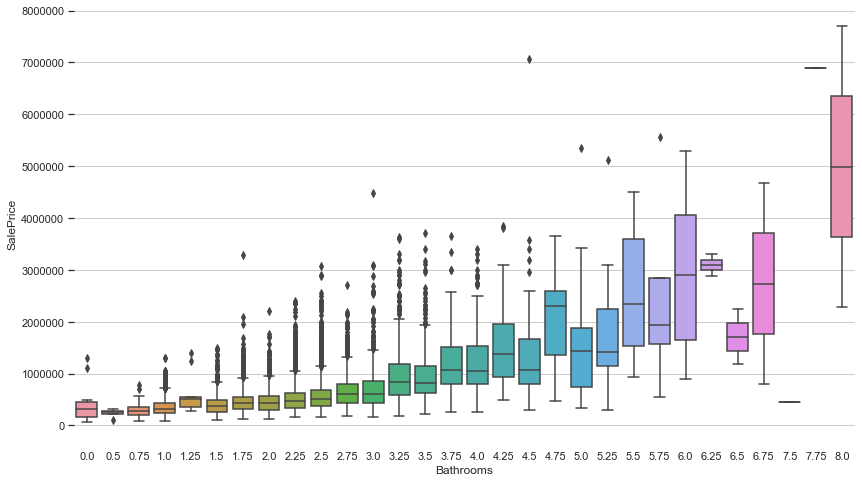

In [14]:
f, axes = plt.subplots(1, 2,figsize=(18,8))
sns.boxplot(x=house1['Bedrooms'],y=house1['SalePrice'], ax=axes[0])
sns.boxplot(x=house1['Floors'],y=house1['SalePrice'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='SalePrice')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_left()
axes[1].set(xlabel='Floors', ylabel='SalePrice')

f, axe = plt.subplots(1, 1,figsize=(14,8))
sns.despine(left=True, bottom=True)
sns.boxplot(x=house1['Bathrooms'],y=house1['SalePrice'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='SalePrice');

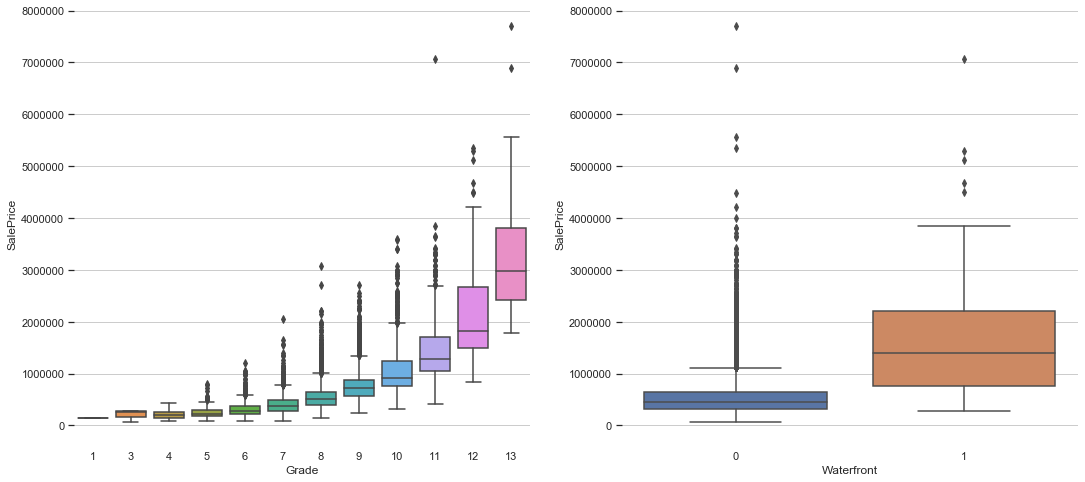

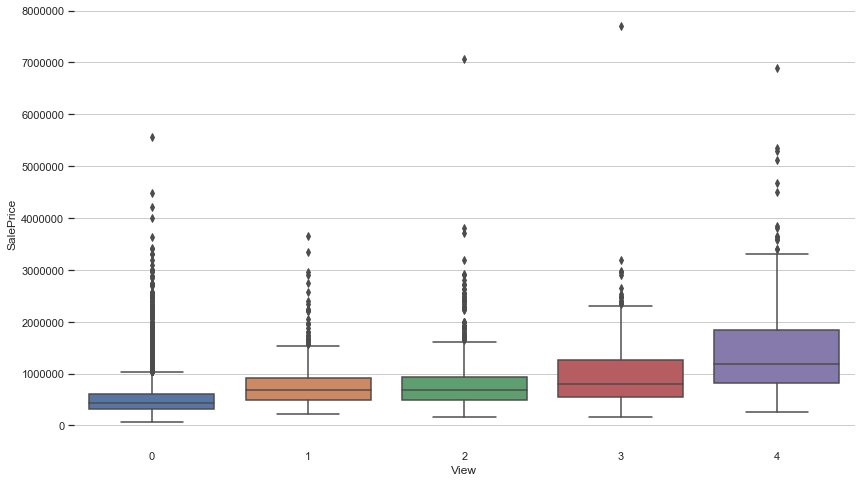

In [15]:
f, axes = plt.subplots(1, 2,figsize=(18,8))
sns.boxplot(x=house1['Grade'],y=house1['SalePrice'], ax=axes[0])
sns.boxplot(x=house1['Waterfront'],y=house1['SalePrice'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Grade', ylabel='SalePrice')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_left()
axes[1].set(xlabel='Waterfront', ylabel='SalePrice')

f, axe = plt.subplots(1, 1,figsize=(14,8))
sns.despine(left=True, bottom=True)
sns.boxplot(x=house1['View'],y=house1['SalePrice'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='View', ylabel='SalePrice');

We can see that there are outliers present in our features. Determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. So we will not be removing outliers.

### Binning

It is a preprocessing technique used to reduce the effects of minor observation errors. It will be worthwhile applying to some columns of this dataset so we have applied binning to YearBuilt and Renovation.

We will be taking current year as our Sale year i.e. 2020 for our model prediction

In [16]:
# just take the year from the date column
house1['Sales_yr']=2020

# add the age of the buildings when the houses were sold as a new column
house1['Age']=house1['Sales_yr'].astype(int)-house1['YearBuilt']

# add the age of the renovation when the houses were sold as a new column
house1['Age_rnv']=0
house1['Age_rnv']=house1['Sales_yr'][house1['Renovation']!=0].astype(int)-house1['Renovation'][house1['Renovation']!=0]
house1['Age_rnv'][house1['Age_rnv'].isnull()]=0

### Train-Test Split

In [17]:
house_new = house1[['Bedrooms', 'Bathrooms','LandSpace', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
                    'Above_sqft', 'Basement', 'Age','Age_rnv','Latitude', 'Longitude', 'LivingSpace15', 'LandSpace15']]

In [18]:
X = house_new.values
y = house1.SalePrice.values

In [19]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=0)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (15129, 16)
x_test :  (6484, 16)
y_train :  (15129,)
y_test :  (6484,)


In [20]:
print(min(y_test))
print(max(y_test))

82000.0
7060000.0


## Machine Learning Algorithms

### Linear Regression

In [21]:
start = time()
linear = LinearRegression()
linear.fit(x_train,y_train)
end = time()
train_time_lm = end-start

In [22]:
lm_score = linear.score(x_test,y_test)
print("Score : ",lm_score)

y_pred_lm = linear.predict(x_test)
exp_lm = explained_variance_score(y_pred_lm,y_test)
print("Variance : ", exp_lm)

rmse_lm = np.sqrt(mean_squared_error(y_pred_lm,y_test))
print("RMSE : ", rmse_lm)

Score :  0.6809667166762426
Variance :  0.5137681811791404
RMSE :  209415.03179177767


### Decision Tree

In [23]:
start = time()
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(x_train, y_train)
end=time()
train_time_tree = end-start

In [24]:
tree_score = dec_tree.score(x_test,y_test)
print("Score : ",tree_score)

y_pred_tree = dec_tree.predict(x_test)
exp_tree = explained_variance_score(y_pred_tree,y_test)
print("Variance : ", exp_tree)

rmse_tree = np.sqrt(mean_squared_error(y_pred_tree,y_test))
print("RMSE : ", rmse_tree)

Score :  0.7121636027610142
Variance :  0.7070614341114769
RMSE :  198912.79066832107


### Random Forest

In [25]:
start = time()
rf = RandomForestRegressor(n_estimators=500,min_samples_split=2,random_state=0)
rf.fit(x_train, y_train)
end = time()
train_time_random = end-start

In [26]:
random_score = rf.score(x_test,y_test)
print("Score : ",random_score)

y_pred_random = rf.predict(x_test)
exp_random = explained_variance_score(y_pred_random,y_test)
print("Variance : ", exp_random)

rmse_random = np.sqrt(mean_squared_error(y_pred_random,y_test))
print("RMSE : ", rmse_random)

Score :  0.8745061520147314
Variance :  0.8395640802357109
RMSE :  131341.22828880366


### Gradient Boost

In [27]:
start = time()
gb = GradientBoostingRegressor(n_estimators=500,min_samples_split=2,learning_rate=0.2,random_state=0)
gb.fit(x_train, y_train)
end = time()
train_time_gradient = end-start

In [28]:
gradient_score = gb.score(x_test,y_test)
print("Score : ",gradient_score)

y_pred_gradient = gb.predict(x_test)
exp_gradient = explained_variance_score(y_pred_gradient,y_test)
print("Variance : ", exp_gradient)

rmse_gradient = np.sqrt(mean_squared_error(y_pred_gradient,y_test))
print("RMSE : ", rmse_gradient)

Score :  0.8945577927983938
Variance :  0.8783397592051361
RMSE :  120391.85317454791


### XGBoost

In [29]:
start = time()
XGB = XGBRegressor(n_estimators=500,min_samples_split=2,learning_rate=0.2,random_state=0)
XGB.fit(x_train, y_train)
end = time()
train_time_xgb = end-start

[23:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
xgb_score = XGB.score(x_test,y_test)
print("Score : ",xgb_score)

y_pred_XGB = XGB.predict(x_test)
exp_xgb = explained_variance_score(y_pred_XGB,y_test)
print("Variance : ", exp_xgb)

rmse_xgb = np.sqrt(mean_squared_error(y_pred_XGB,y_test))
print("RMSE : ", rmse_xgb)

Score :  0.8994822950601048
Variance :  0.8832551382103827
RMSE :  117546.8884121064


## Comparison of Models

In [31]:
models_cross = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
    'Score': [lm_score, tree_score, random_score, gradient_score, xgb_score],
    'Variance Score': [exp_lm, exp_tree, exp_random, exp_gradient, exp_xgb],
    'RMSE': [rmse_lm, rmse_tree, rmse_random, rmse_gradient, rmse_xgb]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score,RMSE
4,XGBoost,0.899482,0.883255,117546.888412
3,Gradient Boosting,0.894558,0.878340,120391.853175
2,Random Forest,0.874506,0.839564,131341.228289
1,Decision Tree,0.712164,0.707061,198912.790668
0,Linear Regression,0.680967,0.513768,209415.031792


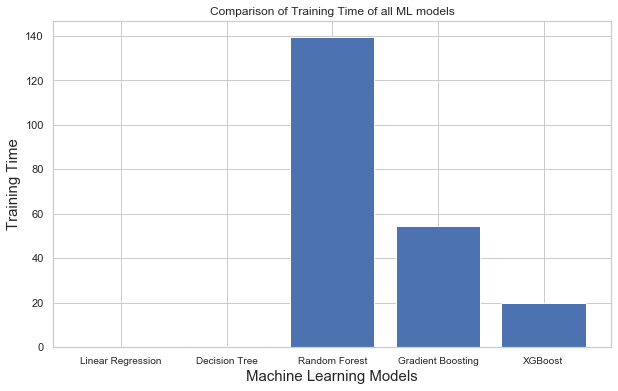

In [34]:
model = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','XGBoost']
Train_Time = [
    train_time_lm,
    train_time_tree,
    train_time_random,
    train_time_gradient,
    train_time_xgb
    
]
index = np.arange(len(model))
plt.figure(figsize=(10,6))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

From the above figure it is inferred that Linear Regression and Decision tree has taken negligible amount of time to train where as Random forest has taken maximum time and it is yet obvious because as we increase the number of tree 500 in this case training time will increase so we should look out for optimal model which has greater accuracy and less training time in comparison to other. 

## Conclusion

We conclude that <b>XGBoost</b> as the best predictive model as its accuracy is highest (i.e. <b>89.95%</b>), highest variance score (i.e. <b>0.88</b>) which is very close to 1 and it took less training time w.r.t accuracy. Also it gives less RMSE score (i.e. <b>117546.89</b>) than other models.